In [2]:
import pandas as pd

## Criar DataFrames com base no CSV

In [3]:
# Carregar DataFrame de Clientes (Customers)
df_customers = pd.read_csv('./datasets/churn_customers.csv')

In [ ]:
# Mostrar os 5 primeiros registros do DataFrame
df_customers.head(5)

In [ ]:
# Mostrar os últimos 5 registros do DataFrame
df_customers.tail(5)

In [ ]:
# Mostrar estrutura/schema do DataFrame
df_customers.info()

In [7]:
# Carregar DataFrame de Serviços (Services)
df_services = pd.read_csv('./datasets/churn_services.csv')

In [ ]:
# Mostrar os 5 primeiros registros do DataFrame
df_services.head(5)

In [ ]:
# Mostrar os últimos 5 registros do DataFrame
df_services.tail(5)

In [ ]:
# Mostrar estrutura/schema do DataFrame
df_services.info()

In [11]:
# Carregar DataFrame de Contratos (Contracts)
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

In [ ]:
# Mostrar os 5 primeiros registros do DataFrame
df_contracts.head(5)

In [ ]:
# Mostrar os últimos 5 registros do DataFrame
df_contracts.tail(5)

In [ ]:
# Mostrar estrutura/schema do DataFrame
df_contracts.info()

## Transformação de Dados

In [15]:
# Transformar coluna TotalCharges de String para Float - Abordagem 1 (astype)
# df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)
# A princípio essa abordagem não funcionou, pois dentro da coluna TotalCharges, tem um campo vazio ' ', o que impossibilita a conversão

In [16]:
# Transformar coluna TotalCharges de String para Float - Abordagem 2 (to_numeric)
# df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)

In [17]:
# Transformar coluna TotalCharges de String para Float - Abordagem 3 (to_numeric com coerce)
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')
# Quando temos algum valor vazio ' ' na tabela, essa é a abordagem recomendável, pois vai sobrepor os erros que irão ocorrer

In [ ]:
# Mostrar estrutura/schema do DataFrame
df_contracts.info()

Após a transformação da coluna TotalCharges do DataFrame Contracts, a coluna passou a ter 11 valores ausentes (missing values)

## Renomear Colunas

In [ ]:
# Renomear coluna no DataFrame - Abordagem 1 (rename e dicionário)
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})
# No final das contas, ele efetivamente não fez essa conversão, só mostrou

In [20]:
# Criar um DataFrame novo, com base nas colunas renomeadas
df_customers_renamed = df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

In [ ]:
# Mostrar estrutura do DataFrame novo
df_customers_renamed.info()

In [22]:
# Aplicar o resultado do rename no próprio DataFrame
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)
# O argumento inplace=True que vai aplicar as mudanças ao DataFrame atual

In [23]:
# Rename usando Lista - Modificar todos os nomes de colunas
df_customers.columns = ['IDCliente', 'Genero', 'Mais65anos', 'TemParceiro', 'TemDependentes']

In [ ]:
df_customers.info()

## Unificar os DataFrames de Customers, Services e Contracts

In [ ]:
# Contar quantidade de registros por DataFrame
len(df_customers)

In [ ]:
len(df_contracts)

In [ ]:
len(df_services)

In [28]:
# Renomear colunas
df_services.rename(columns={'customerID': 'IDCliente'}, inplace=True)

In [29]:
# Unificar DataFrame de Customers com Services, criando um terceiro DataFrame
df_temp = df_customers.merge(df_services, on=['IDCliente'])

In [30]:
# Unificar df_temp com Contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [31]:
# Unificar os três DataFrames ao mesmo tempo, com colunas que possuem nomes diferentes
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])
# O comando é basicamente uma unificação do comando utilizado acima, porém, nesse caso, ele tira a necessidade de utilizar um DataFrame intermediário

In [32]:
# Removendo coluna de um DataFrame (Nesse caso, a coluna que está duplicada após o merge)
df_churn.drop(['customerID'], axis=1, inplace=True)
# O axis=1 define que a alteração que será realizada, é a nível de coluna, e o inplace=True para executar a ação efetivamente, não só exibi-la

## Lidando com dados ausentes

Dados faltantes completamente ao acaso (MCAR - Missing Completely at Random) - 
O fato de que um certo valor está faltando não tem nada a ver com o seu valor hipotético e com os valores de outras variáveis

Dados faltantes ao acaso (MAR - Missing at Random) - Faltar dados aleatoriamente significa que a propensão para um ponto de dados estar ausente não está relacionada aos dados ausentes, mas está relacionada a alguns dos dados observados

Dados faltantes não ao acaso (MNAR - Missing not at Random) - Duas razões possíveis são que o valor ausente depende do valor hipotético ou o valor ausente depende do valor de alguma outra variável

In [ ]:
# Detectar valores ausentes em todas as colunas de um DataFrame
df_churn.isna().sum()

In [ ]:
# Detectar valores ausentes em uma coluna específica
df_churn.TotalCharges.isna().sum()

In [ ]:
# Quantas linhas tem pelo menos 1 coluna com valor ausente
df_churn[df_churn.isna().any(axis=1)]

In [ ]:
# Quantas colunas tem pelo menos 1 valor ausente
df_churn.isna().any(axis=0).sum()

## Remover valores ausentes

In [ ]:
# Remover de forma direta e específica a coluna que possuí valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1)
# Nesse caso se subentende que eu já sei qual a coluna que quero excluir

In [ ]:
# Remover colunas com valores ausentes
df_churn.dropna(axis=1)
# O axis=1 define que iremos trabalhar a nível de colunas, se fosse como 0, ele iria remover as linhas

In [ ]:
# Remover colunas onde todos os valores estão ausentes
df_churn.dropna(axis=1, how='all')

In [ ]:
# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

In [ ]:
# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=0, how='all')

## Inputação de Valores Ausentes

In [ ]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

In [ ]:
# Preencher valores padrão conforme a coluna
df_churn.fillna(value={'TotalCharges': 0})

In [ ]:
# Preencher todos os valores ausentes de uma coluna com a média
media_TotalCharges = df_churn.TotalCharges.mean()
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

## Análise Univariada

- A faixa etária do cliente tem uma forte associcação com o churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao churn
- Cliente com contrato mensal é mais propenso ao Churn

In [ ]:
# Contar clientes usando a variável churn como referência
df_churn.Churn.value_counts()

In [ ]:
# Como identificar valores possíveis (únicos) numa variável do DataFrame
df_churn.Churn.unique()

In [ ]:
# Como é a distribuição de Clientes (percentual) que abandonaram ou continuam ativos
df_churn.Churn.value_counts(normalize=True)

In [ ]:
# Plot da distribuição do Churn (Quantidade)
ax = df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Plot da distribuição do Churn (Percentual)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Quais são os tipos de contrato
df_churn.Contract.unique()

In [ ]:
# Plot da distribuição do Contract (Quantidade)
ax = df_churn.Contract.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Plot da distribuição do Contract (Percentual)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Histograma do Tempo de Contrato
df_churn.tenure.plot.hist()

- A variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal.
- A grande parte dos valores se concentram nos extremos, ou seja, contratos com poucos meses de ativação e contratos longos, acima aproximadamente dos 65 meses.

In [ ]:
# Histograma do Monthly Charges
df_churn.MonthlyCharges.plot.hist()

In [ ]:
# Medidas de Posição - Média do Tempo de Contrato
df_churn.tenure.mean()

In [ ]:
# Medidas de Posição - Mediana do Tempo de Contrato
df_churn.tenure.median()

In [ ]:
# Medidas de Posição - Moda do Tempo de Contrato
df_churn.tenure.mode()

In [ ]:
# Medidas de Dispersão - Desvio Padrão do Tempo de Contrato
df_churn.tenure.std()
# Significa a variação desses valores para cima e para baixo, com relação a média

In [ ]:
# Medidas de Dispersão - Coeficiente de Variação
df_churn.tenure.std() / df_churn.tenure.mean() * 100

In [ ]:
# Quantos clientes possuem 1 mês de contrato - Filtro
len(df_churn[(df_churn.tenure==1)])

In [ ]:
# Quanto os clientes de 1 mês de contrato representam percentualmente
len(df_churn[(df_churn.tenure==1)]) / len(df_churn) * 100

In [ ]:
# Quantos clientes possuem entre 1 e 6 meses de contrato
len(df_churn[(df_churn.tenure>=1) & (df_churn.tenure <= 6)])

In [ ]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento com sumarização - Formato de texto
df_churn.groupby(['tenure'])['tenure'].count().sort_values(ascending=False)

In [ ]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento com sumarização - Formato de plot
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize=(20, 20))

## Análise Bivariada

In [67]:
# Hipótese: Clientes com Contrato do Tipo Mensal são mais propensos ao Churn
# Construir Tabela de contingência entre tipo de contrato e churn - Quantidade
pd.crosstab(df_churn.Churn, df_churn.Contract, margins=True, margins_name='Total')


Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [70]:
# Construir Tabela de contingência entre tipo de contrato e churn - Proporção
pd.crosstab(df_churn.Churn, df_churn.Contract, normalize='index', margins=True, margins_name='Total') * 100

Contract,Month-to-month,One year,Two year
Churn,,,
No,42.906842,25.260920,31.832238
Yes,88.550027,8.881755,2.568218
Total,55.019168,20.914383,24.066449


Considerando o público total, os clientes de contrato mensal representam 55%. Porém, se considerarmos apenas os clientes que abandonaram o serviço, 88% tinham contrato mensal. Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.

### Avaliar a correlação entre duas variáveis categóricas (qualitativas)

Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
Em um teste de hipótese, duas hipóteses são formuladas:
- H0 (Hipótese Nula): As duas variáveis são independentes
- H1 (Hipótese Complementar): As duas variáveis não são independentes

O teste serve para confirmar ou recusar a hipótese nula (H0)
Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value), recusamos a hipótese nula e seguimos com a complementar

In [71]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_contract = pd.crosstab(df_churn.Churn, df_churn.Contract)

In [72]:
# Calcular os Scores e P-Values
from scipy.stats import chi2_contingency

In [81]:
# Tupla = Lista imutável
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)

In [82]:
chi_scores_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [75]:
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])

In [76]:
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])

In [77]:
# Apresentar números com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

In [79]:
# Criar DataFrame com os resultados
df_chi_scores_churn_contract = pd.DataFrame({'Qui2': scores_churn_contract, 
                                             'p-value': pvalues_churn_contract})

In [80]:
# Analisar Scores e P-Values
df_chi_scores_churn_contract

,Qui2,p-value
0,1184.596572083792580,0.000000000000000


Conforme Teste Estatístico (Chi-Square), o p-value <= 0.05, desta forma, rejeitamos a hipótese nula, ou seja, as variáveis não são independentes. Pelo Qui2 alto, podemos afirmar que há uma forte correlação.

### Avaliar a correlação entre uma variável qualitativa e quantitativa
Usar o mesmo teste de Chi-Square, mas transformar a variável quantitativa em qualitativa
- Hipótese: Cliente com menos de 6 meses de contrato é mais propenso ao Churn


In [83]:
# Criar uma coluna nova no DataFrame com base numa condição de coluna - Nome da coluna: 'TempoMenor6Meses'

import numpy as np

In [84]:
# Criar coluna nova
df_churn['TempoMenor6Meses'] = np.where(df_churn.tenure < 6, 'Yes', 'No')

In [85]:
# Checar o DataFrame
df_churn.head(5)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes


In [86]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_tenure = pd.crosstab(df_churn.Churn, df_churn.TempoMenor6Meses)

In [87]:
# Calcular os Scores
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

In [88]:
scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])

In [89]:
# Criar DataFrame com os resultados
df_chi_scores_churn_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 
                                             'p-value': pvalues_churn_tenure})

In [104]:
# Analisar os resultador
df_chi_scores_churn_tenure

,Qui2,p-value
0,669.721615828710242,0.000000000000000


Como o p-value <= 0.05, rejeitamos a H0, ou seja, as variáveis não são independentes. E vale mencionar que, com base no Qui2 resultante das 2 análises, a correlação entre Churn e Tempo de Contrato < 6 meses é menor do que a correlação entre Churn e Tipo de Contrato.

### Correlação entre 2 variáveis numéricas - Tenure com TotalCharges
A intuição é que, quanto mais tempo de contrato, maior o valor pago.


In [92]:
# Correlação entre 2 variáveis numéricas - Pearson
df_churn.tenure.corr(df_churn.TotalCharges)

0.8258804609332018

In [93]:
# Correlação entre 2 variáveis numéricas - Spearman
df_churn.tenure.corr(df_churn.TotalCharges, method='spearman')

0.8891770805365491

Há uma forte correlação entre Tenure e TotalCharges, usando métodos estatísticos de correlação.

<Axes: xlabel='tenure', ylabel='TotalCharges'>

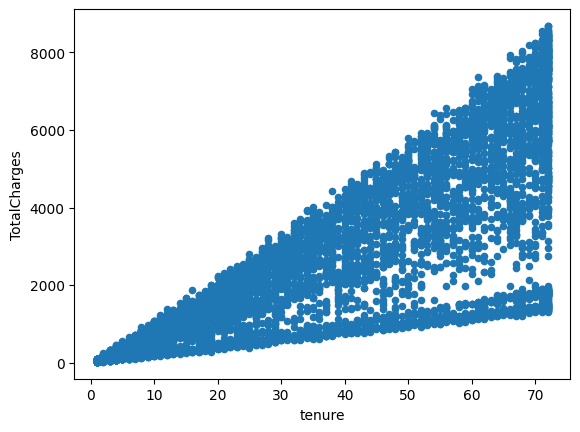

In [94]:
# Apresentar Plot Scatter entre Tenure e TotalCharges - Gráfico de dispersão
df_churn.plot.scatter(x='tenure', y='TotalCharges')

- Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte associação com o Churn
- Desafio 2: Validar com Teste de Hipótese, se Contrato Mensal está mais propenso ao Churn.

### Desafio 1

In [97]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_mais65anos = pd.crosstab(df_churn.Churn, df_churn.Mais65anos)

In [98]:
df_crosstab_churn_mais65anos

Mais65anos,0,1
Churn,,
No,4508,666
Yes,1393,476


In [99]:
# Calcular os Scores
chi_scores_churn_mais65anos = chi2_contingency(df_crosstab_churn_mais65anos)

In [100]:
scores_churn_mais65anos = pd.Series(chi_scores_churn_mais65anos[0])
pvalues_churn_mais65anos = pd.Series(chi_scores_churn_mais65anos[1])

In [101]:
# Criar DataFrame com os resultados
df_chi_scores_churn_mais65anos = pd.DataFrame({'Qui2': scores_churn_mais65anos, 
                                             'p-value': pvalues_churn_mais65anos})

In [103]:
df_chi_scores_churn_mais65anos

,Qui2,p-value
0,159.426300368387416,0.000000000000000


Como o p-value <= 0.05, rejeitamos a H0, ou seja, as variáveis não são independentes. E, dado o valor de Qui2, a correlação entre as 2 variáveis é bem menor do que as analisadas anteriormente, ou seja, podemos dizer que clientes com uma faixa etária maior são menos propensos ao Churn.

### Desafio 2

In [105]:
# Criar coluna nova
df_churn['TemContratoMensal'] = np.where(df_churn.Contract == 'Month-to-month', 'Yes', 'No')

In [106]:
df_churn.head(5)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses,TemContratoMensal
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes,Yes


In [108]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_temcontrato = pd.crosstab(df_churn.Churn, df_churn.TemContratoMensal)

In [109]:
# Calcular os Scores
chi_scores_churn_temcontrato = chi2_contingency(df_crosstab_churn_temcontrato)

In [110]:
scores_churn_temcontrato = pd.Series(chi_scores_churn_temcontrato[0])
pvalues_churn_temcontrato = pd.Series(chi_scores_churn_temcontrato[1])

In [111]:
# Criar DataFrame com os resultados
df_chi_scores_churn_temcontrato = pd.DataFrame({'Qui2': scores_churn_temcontrato, 
                                             'p-value': pvalues_churn_temcontrato})

In [112]:
df_chi_scores_churn_temcontrato

,Qui2,p-value
0,1153.971661109347906,0.000000000000000


Como o p-value <= 0.05, rejeitamos a H0, ou seja, as variáveis não são independentes. E, dado o valor de Qui2, a correlação entre as 2 variáveis é grande, ou seja, há grande chance de clientes com contrato mensal serem mais propensos ao churn.